### THE SPARKS FOUNDATION #GRIPAPRIL22

### AUTHOR: GITESH JETLY

### TASK 1: PREDICTION USING SUPERVISED ML

PERFORM EXPLOLATORY DATA ANALYSIS ON DATASET 'STUDENT' TO PREDICT THE PERCENTAGE OF MARKS OF THE STUDENTS BASED ON THE NUMBER OF HOURS THEY STUDIED.

DATASET SAMPLE: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

STEP 1: import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### DATA PREPROCESSING

STEP 2: Read the data

In [ ]:
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head() #returns first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail() #returns last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.sample(5) #To get five random rows back

,Hours,Scores
3,8.5,75
5,1.5,20
6,9.2,88
9,2.7,25
14,1.1,17


STEP 3: We will check if there is any null value in the Dataset

In [ ]:
data.isnull == True

False

Hence, there is none null value in dataset.

### DATA EXPLORATION

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

-The mean, or average.

-50% aka Median it is very import to understand Skeweness of the Data.

-The standard deviation, or how spread out the data is.

-The minimum and maximum value of each column

-The number of items that fall within the first, second, and third percentiles.

### DATA VISUALISATION

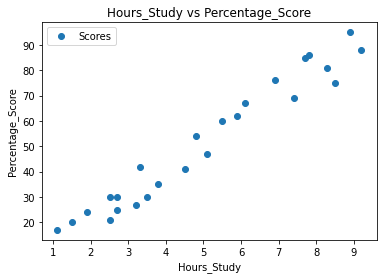

In [ ]:
data.plot(x='Hours',y='Scores', style = 'o')
plt.title('Hours_Study vs Percentage_Score')
plt.xlabel('Hours_Study')
plt.ylabel('Percentage_Score')
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'. From plot we came to know that the problem can be solved by linear regression.

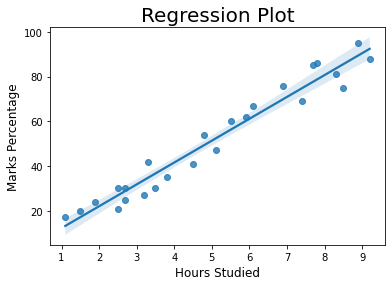

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It shows that the variables are positively correlated.

### TRAINING THE MODEL

### Splitting the data

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data into two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## Fitting the data into the model

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

### Predicting the Percentage of Marks

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually Comparing the Predicted Marks with the Actual Marks

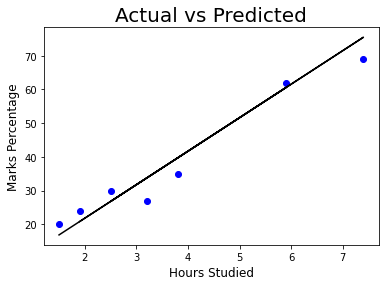

In [ ]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the Model

In [ ]:
# Error Metrics
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Small value of Mean absolute error states that the chances of error through the model are very less.

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


## Accoring to Linear Regression Model, the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 93.893.